# Random Forest Machine

Callum Freeburn

# Import Libraries 

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn
from sklearn import metrics
import pandas as pd
import os
from collections import Counter
import sklearn

## Breast Cancer Dataset - Note: rerun Import Libraries before changing Dataset

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


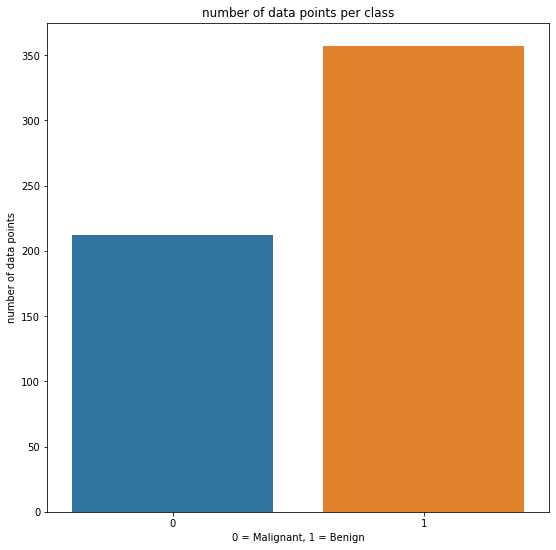

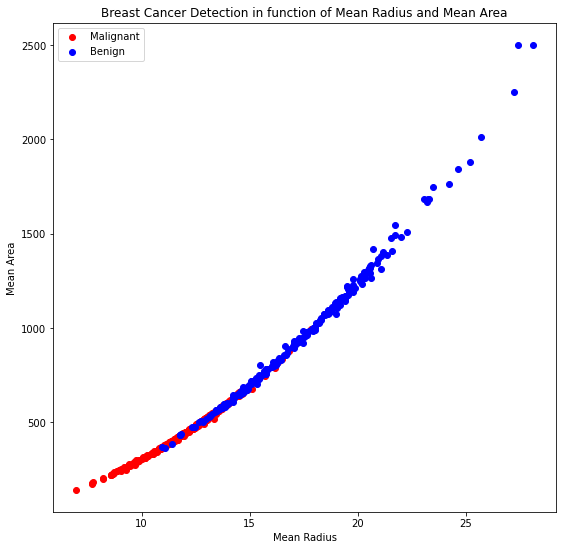

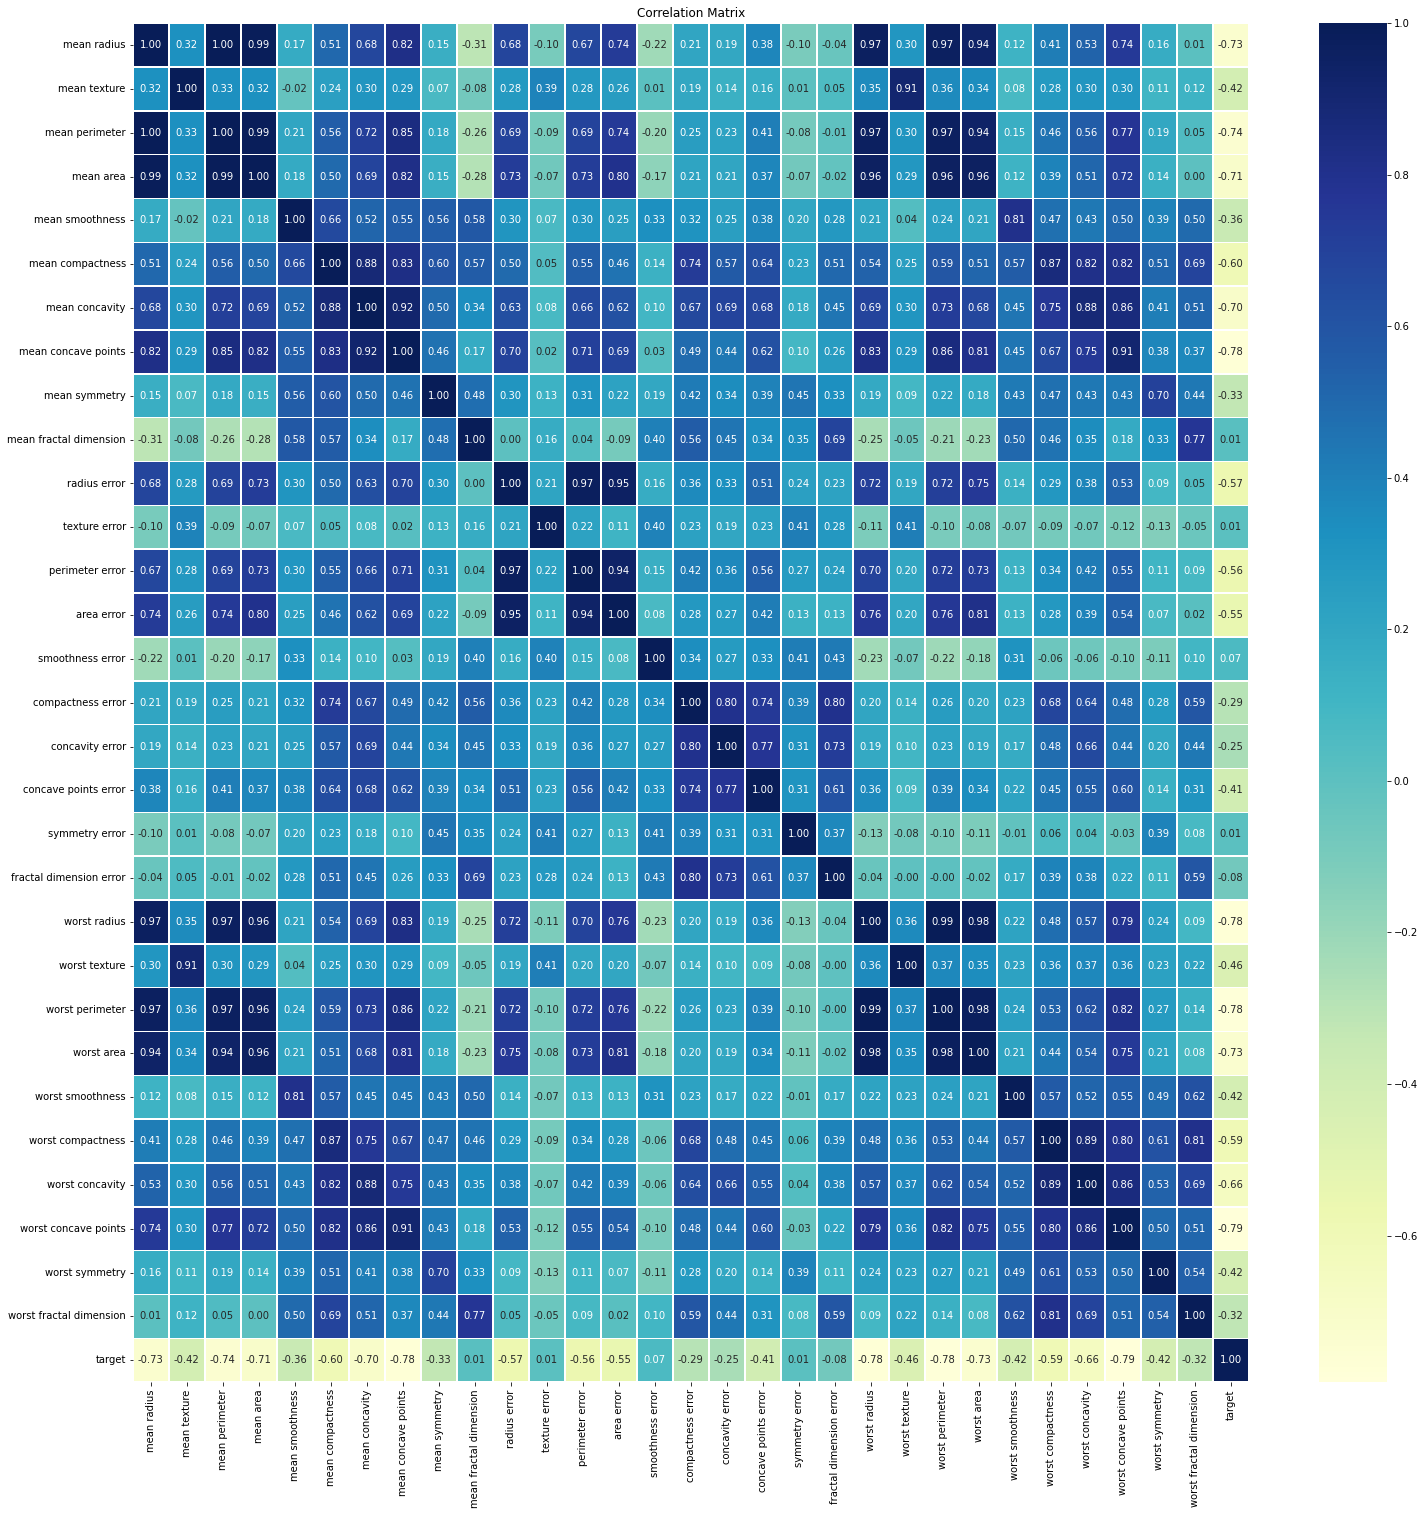

In [12]:
# Load Data set
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

# Put in dataframe
df = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
# Add a target column, and fill it with the target data
df['target'] = breast_cancer_dataset.target

print(df.head())

print ('Missing values :{}'.format(df.isnull().any().sum()))

print ('number of duplicated vales : {}'.format(df.duplicated().sum()))


# Bar Graph
plt.figure(figsize = (9, 9))
seaborn.countplot(df["target"])
plt.title("number of data points per class")
plt.ylabel("number of data points")
plt.xlabel("0 = Malignant, 1 = Benign")
plt.show()

# Scatterplot
plt.figure(figsize=(9,9))
plt.scatter(df['mean radius'][df.target==1], 
            df['mean area'][df.target==1], 
            c="red")

plt.scatter(df['mean radius'][df.target==0], 
            df['mean area'][df.target==0], 
            c="blue")

plt.title("Breast Cancer Detection in function of Mean Radius and Mean Area")
plt.xlabel("Mean Radius")
plt.legend(["Malignant", "Benign"])
plt.ylabel("Mean Area");

# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(25, 25))
seaborn.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu")
plt.title('Correlation Matrix');

#Normalize
df=(df-df.mean())/df.std()

# Store the feature data
X = breast_cancer_dataset.data
# store the target data
y = breast_cancer_dataset.target
# split the data using Scikit-Learn's train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=10)

## Banknote Authentication Dataset - Note: rerun Import Libraries before changing Dataset

   Notes  Variance_WT  Skewness_WT  Curtosis_WT  Entropy  Class
0      1      3.62160       8.6661      -2.8073 -0.44699      0
1      2      4.54590       8.1674      -2.4586 -1.46210      0
2      3      3.86600      -2.6383       1.9242  0.10645      0
3      4      3.45660       9.5228      -4.0112 -3.59440      0
4      5      0.32924      -4.4552       4.5718 -0.98880      0
Missing values :0
number of duplicated vales : 0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


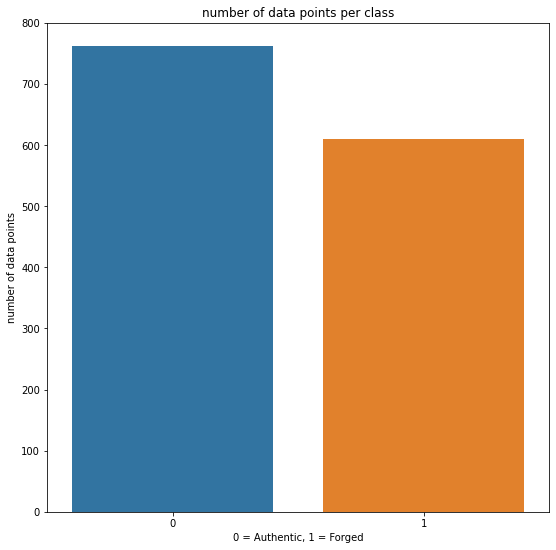

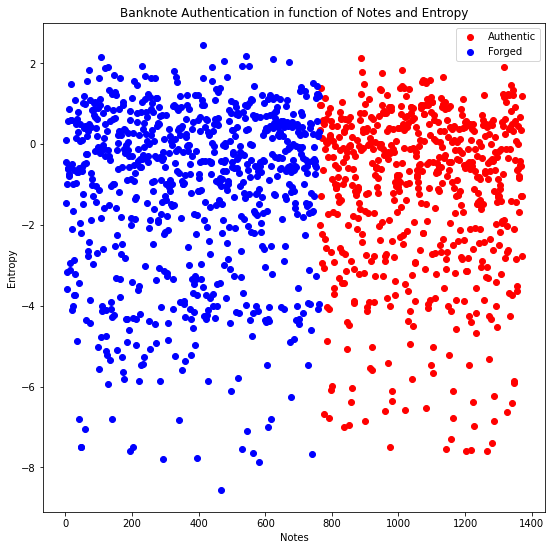

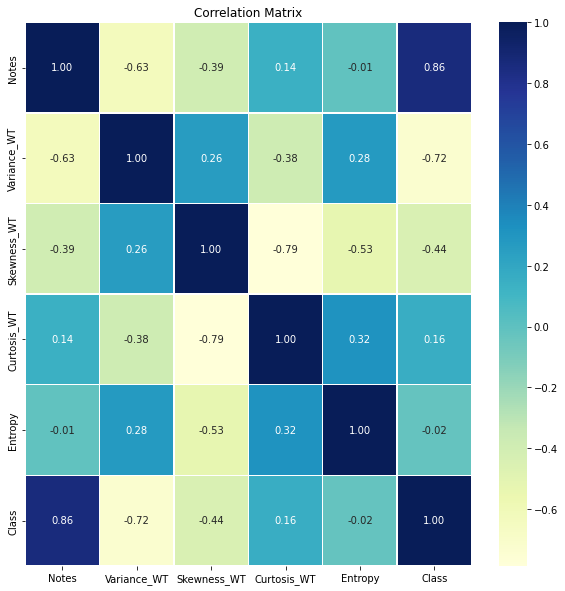

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/Callum-Freeburn27/Random_Forest_From_Scratch/main/data_banknote_authentication_dataset.csv')

print(df.head())

print ('Missing values :{}'.format(df.isnull().any().sum()))

print ('number of duplicated vales : {}'.format(df.duplicated().sum()))

# Bar Graph
plt.figure(figsize = (9, 9))
seaborn.countplot(df["Class"])
plt.title("number of data points per class")
plt.ylabel("number of data points")
plt.xlabel("0 = Authentic, 1 = Forged")
plt.show()

# Scatterplot
plt.figure(figsize=(9,9))
plt.scatter(df['Notes'][df.Class==1], 
            df['Entropy'][df.Class==1], 
            c="red")

plt.scatter(df['Notes'][df.Class==0], 
            df['Entropy'][df.Class==0], 
            c="blue")

plt.title("Banknote Authentication in function of Notes and Entropy")
plt.xlabel("Notes")
plt.legend(["Authentic", "Forged"])
plt.ylabel("Entropy")

# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 10))
seaborn.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu")
plt.title('Correlation Matrix');

#Normalize
df=(df-df.mean())/df.std()

datasets = df.to_numpy()

X = np.array(datasets[:,:-1], dtype=np.float64)
y = np.array(datasets[:,-1], dtype=np.int64)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30 ,random_state = 1)

## MNIST Digits Dataset Note: rerun Import Libraries before changing Dataset

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        8.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0       13.0       10.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


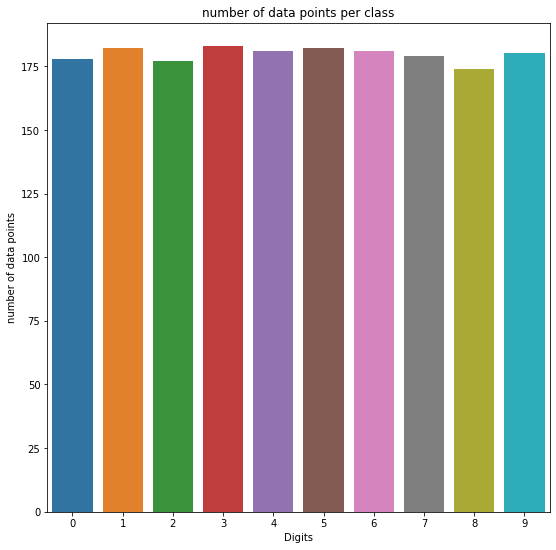

0


<Figure size 432x288 with 0 Axes>

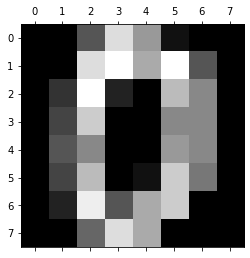

1


<Figure size 432x288 with 0 Axes>

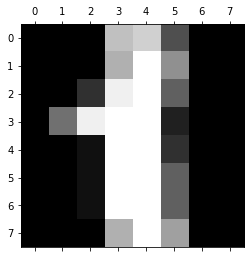

2


<Figure size 432x288 with 0 Axes>

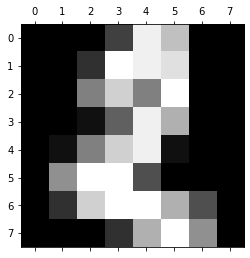

3


<Figure size 432x288 with 0 Axes>

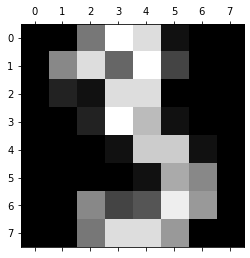

In [16]:
# Load Data set
digits_dataset = sklearn.datasets.load_digits()

# Put in dataframe
df = pd.DataFrame(digits_dataset.data, columns=digits_dataset.feature_names)
# Add a target column, and fill it with the target data
df['target'] = digits_dataset.target

print(df.head())

print ('Missing values :{}'.format(df.isnull().any().sum()))

print ('number of duplicated vales : {}'.format(df.duplicated().sum()))

print(len(breast_cancer_dataset.feature_names))

# Bar Graph
plt.figure(figsize = (9, 9))
seaborn.countplot(df["target"])
plt.title("number of data points per class")
plt.ylabel("number of data points")
plt.xlabel("Digits")
plt.show()


for i in range(4):
  plt.gray()
  plt.matshow(digits_dataset.images[i])
  print(digits_dataset.target[i])
  plt.show()

# Store the feature data
X = digits_dataset.data
# store the target data
y = digits_dataset.target
# split the data using Scikit-Learn's train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=10)

## Build the Decision Tree Class

In [17]:
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

class Node:

    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None
        
class DecisionTree:

    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        #stopping criteria
        if (depth >= self.max_depth
                or n_labels == 1
                or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        #greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        
        #grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        #parent loss
        parent_entropy = entropy(y)

        #generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        #compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        #information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

## Build the Random Forest Class and Helper Functions

In [18]:
class RandomForest:
    
    def __init__(self, n_trees=10, min_samples_split=2,
                 max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split,
                max_depth=self.max_depth, n_feats=self.n_feats)
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]
    
def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common

## Fit the Model and Get Accuracy

In [19]:
# Config Random Forest Class
clf = RandomForest(n_trees=10, min_samples_split=2, max_depth=30, n_feats=8)
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [20]:
#Accuracy function
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy

In [21]:
#Accuracy 
print("Training Data SVM Accuracy: ", accuracy(y_train, train_predictions) * 100)
print("Testing Data SVM Accuracy: ", accuracy(y_test, test_predictions)* 100)

print(classification_report(y_test, test_predictions))

Training Data SVM Accuracy:  99.93041057759221
Testing Data SVM Accuracy:  94.44444444444444
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.94      0.94      0.94        34
           2       0.94      0.94      0.94        34
           3       0.91      0.97      0.94        40
           4       0.91      0.94      0.93        34
           5       1.00      0.91      0.95        32
           6       1.00      0.97      0.99        37
           7       0.95      1.00      0.98        40
           8       0.83      0.88      0.85        33
           9       0.97      0.90      0.93        39

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



## Confusion Matrix

[[36  0  0  0  1  0  0  0  0  0]
 [ 0 32  1  0  1  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  2  0]
 [ 0  0  0 39  0  0  0  0  1  0]
 [ 0  0  0  0 32  0  0  0  2  0]
 [ 0  0  0  1  0 29  0  0  1  1]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  1  1  1  0  0  0 29  0]
 [ 0  0  0  2  0  0  0  2  0 35]]


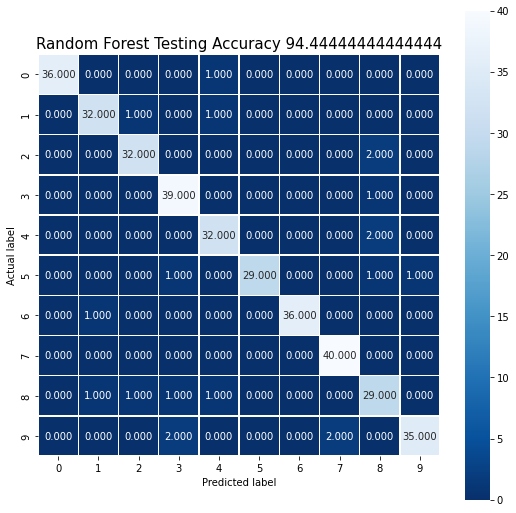

In [22]:
#config confussion matrix
cm  = metrics.confusion_matrix(y_test, test_predictions)
print(cm)

# Visulise Confussion Matrix
plt.figure(figsize=(9,9))
seaborn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest Testing Accuracy {0}'.format(accuracy(y_test, test_predictions)* 100)
plt.title(all_sample_title, size = 15);

## Hyperparamater Tuning

Number of Decision Trees

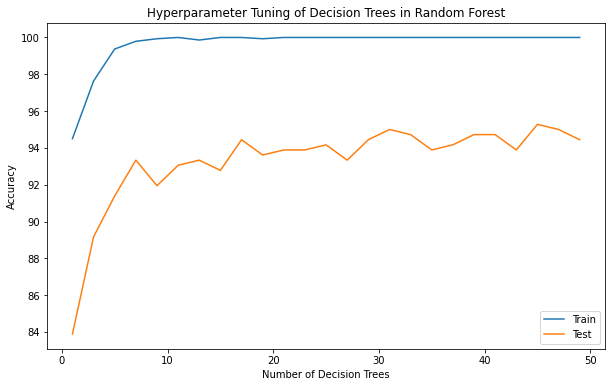

In [ ]:
n_trees = range(1, 50, 2)
Test_accuracy_vals = []
Train_accuracy_vals = []
for i in n_trees:
  clf = RandomForest(n_trees=i)
  clf.fit(X_train, y_train)
  prediction = clf.predict(X_test)
  Train_accuracy_vals.append(accuracy(y_train, clf.predict(X_train)) * 100)
  Test_accuracy_vals.append(accuracy(y_test, prediction) * 100)


csv = pd.DataFrame({'Number of Decision Trees':n_trees, 'Train Accuracy':Train_accuracy_vals, 
                    'Test Accuracy':Test_accuracy_vals})

plt.rcParams['figure.figsize'] = (10,6)
plt.plot(csv['Number of Decision Trees'], csv['Train Accuracy'], label = "Train")
plt.plot(csv['Number of Decision Trees'], csv['Test Accuracy'], label = "Test")
plt.xlabel('Number of Decision Trees')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy')
# Set a title of the current axes.
plt.title('Hyperparameter Tuning of Decision Trees in Random Forest')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

### Max depth of Decision Trees

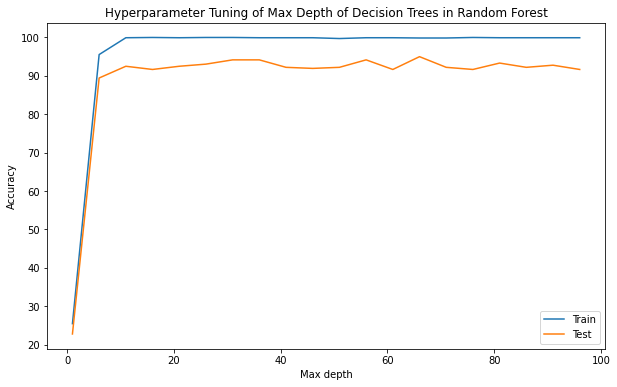

In [ ]:
max_depth = range(1, 100, 5)
Test_accuracy_vals = []
Train_accuracy_vals = []
for i in max_depth:
  clf = RandomForest(max_depth=i)
  clf.fit(X_train, y_train)
  prediction = clf.predict(X_test)
  Train_accuracy_vals.append(accuracy(y_train, clf.predict(X_train)) * 100)
  Test_accuracy_vals.append(accuracy(y_test, prediction) * 100)


csv = pd.DataFrame({'Max depth':max_depth, 'Train Accuracy':Train_accuracy_vals, 
                    'Test Accuracy':Test_accuracy_vals})

plt.rcParams['figure.figsize'] = (10,6)
plt.plot(csv['Max depth'], csv['Train Accuracy'], label = "Train")
plt.plot(csv['Max depth'], csv['Test Accuracy'], label = "Test")
plt.xlabel('Max depth')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy')
# Set a title of the current axes.
plt.title('Hyperparameter Tuning of Max Depth of Decision Trees in Random Forest')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Maximum Number of Features given to a Decision Tree in the Random Forest

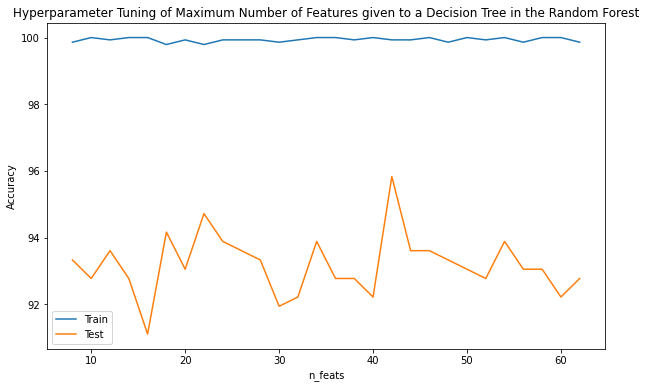

In [9]:
n_feats = range(8, 64, 2)
Test_accuracy_vals = []
Train_accuracy_vals = []
for i in n_feats:
  clf = RandomForest(n_feats=i)
  clf.fit(X_train, y_train)
  prediction = clf.predict(X_test)
  Train_accuracy_vals.append(accuracy(y_train, clf.predict(X_train)) * 100)
  Test_accuracy_vals.append(accuracy(y_test, prediction) * 100)


csv = pd.DataFrame({'n_feats':n_feats, 'Train Accuracy':Train_accuracy_vals, 
                    'Test Accuracy':Test_accuracy_vals})

plt.rcParams['figure.figsize'] = (10,6)
plt.plot(csv['n_feats'], csv['Train Accuracy'], label = "Train")
plt.plot(csv['n_feats'], csv['Test Accuracy'], label = "Test")
plt.xlabel('n_feats')
# Set the y axis label of the current axis.
plt.ylabel('Accuracy')
# Set a title of the current axes.
plt.title('Hyperparameter Tuning of Maximum Number of Features given to a Decision Tree in the Random Forest')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()